In [2]:
import numpy as np 
import pandas as pd 
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import cdist, pdist
from matplotlib import pyplot as plt
from scipy.spatial import distance
import math
from google.colab import drive
import os
import seaborn as sns

#mount your Google drive into this notebook
drive.mount('/content/gdrive')
#find the path to your Google drive root
os.getcwd()+"/gdrive/My Drive"
os.chdir('/content/gdrive/My Drive/Colab Notebooks/Data Mining/HW4')

%matplotlib inline
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 100

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


              x0         x1
1      13.513730  45.033556
2      15.075595  55.974410
3      19.713162  50.680964
4      15.931429  50.227550
5      14.874820  47.480738
...          ...        ...
1036   56.594154  16.610712
1037   64.795129  15.395361
1038   60.979660  17.002262
1039   60.774582  15.815247
1040  115.000000  95.000000

[1040 rows x 2 columns]


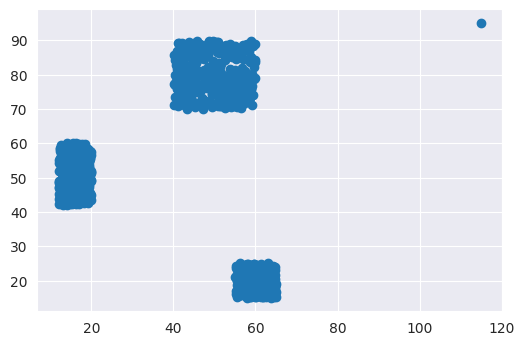

In [3]:
c2 = pd.read_csv("C2.txt", delim_whitespace=True, names=['x0', 'x1'])
print (c2)
plt.scatter(c2['x0'],c2['x1'])

In [0]:
data_set = []
for index, row in c2.iterrows():
        data_set.append([row['x0'], row['x1']]) 
data_set = np.array(data_set)

In [0]:
def gonzalez(data, cluster_num, technique = 'max'):
    clusters = []
    clusters.append(data[0]) # let us assign the first cluster point to be first point of the data
    while len(clusters) is not cluster_num:
        if technique is 'max':
            clusters.append(max_dist(data, clusters)) 
        if technique is 'norm':
            clusters.append(norm_dist(data, clusters)) 
        # we add the furthest point from ALL current clusters
    return (clusters)

In [0]:
def max_dist(data, clusters):
    distances = np.zeros(len(data)) # we will keep a cumulative distance measure for all points
    for cluster_id, cluster in enumerate(clusters):
        for point_id, point in enumerate(data):
            if distance.euclidean(point,cluster) == 0.0:
                distances[point_id] = -math.inf # this point is already a cluster (obselete)
            if not math.isinf(distances[point_id]):
                # if a point is not obselete, then we add the distance to its specific bin
                distances[point_id] = distances[point_id] + distance.euclidean(point,cluster) 
                # return the point which is furthest away from all the other clusters
    return data[np.argmax(distances)]

In [7]:
cluster_points = gonzalez(data_set, 3)
print('Cluster Centeroids:', cluster_points)

Cluster Centeroids: [array([13.51372985, 45.03355641]), array([115.,  95.]), array([64.53270534, 15.09821553])]


In [8]:
cluster_distance = np.full(len(data_set), np.inf)
clusters = [[] for i in range(3)]
for point_idx, point in enumerate(data_set):
    closest_center= 0
    for cluster_idx, cluster_point in enumerate(cluster_points):
        if distance.euclidean(point,cluster_point) < cluster_distance[point_idx]:
            cluster_distance[point_idx] = distance.euclidean(point,cluster_point)
            closest_center = cluster_idx 
    clusters[closest_center].append(point)     
print('3-center cost:', np.max(cluster_distance))

3-center cost: 60.09493752598304


In [9]:
cost = math.sqrt(np.sum(cluster_distance**2, axis=0) /len(data_set))
print('3-means cost:', cost)

3-means cost: 29.590556306970086


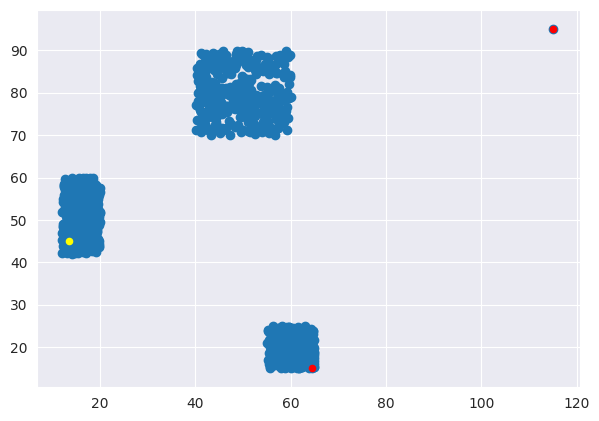

In [10]:
plt.figure(figsize=(7,5))
plt.scatter(c2['x0'],c2['x1'])
for index, point in enumerate(cluster_points):
    if index is not 0: # these points are generated
        plt.scatter(point[0],point[1], marker='o', c='red', s=20)
    if index is 0: # this is our ifrst point, which was picked staticly
        plt.scatter(point[0],point[1], marker='o', c='yellow', s=20)

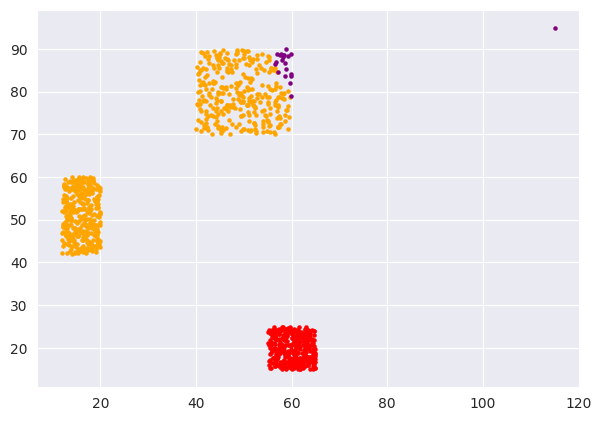

In [24]:
plt.figure(figsize=(7,5))
#plt.scatter(c2['x0'],c2['x1'])
for index, point in enumerate(clusters[0]):
        plt.scatter(point[0],point[1], marker='o', c='orange', s=5)
for index, point in enumerate(clusters[1]):
        plt.scatter(point[0],point[1], marker='o', c='purple', s=5)
for index, point in enumerate(clusters[2]):
        plt.scatter(point[0],point[1], marker='o', c='red', s=5)    

In [0]:
#################skip
cluster_distance = np.full(len(data_set), np.inf)
for point_idx, point in enumerate(data_set):
    for cluster_idx, cluster_point in enumerate(cluster_points):
        if cluster_distance[point_idx] is math.inf:
            cluster_distance[point_idx] = distance.euclidean(point,cluster_point)
            continue
        if distance.euclidean(point,cluster_point) < cluster_distance[point_idx]:
            cluster_distance[point_idx] = distance.euclidean(point,cluster_point)
print('3-center cost:', np.max(cluster_distance))

3-center cost: 60.09493752598304
